# Unsupervised Learning

*Clustering and dimensionality reduction: k-means clustering, hierarchical clustering, principal component analysis (PCA), singular value decomposition (SVD)*

In unsupervised learning, we don't have output values in mind when building our algorithm. The point of unsupervised learning is to model the underlying distribution of our samples and to determine the structure of our data.

One way we can think about unsupervised and supervised learning is to consider the difference between drawing *boundaries* and *grouping* samples.

<img src="https://deepcast.ai/static/img/article3/art3-fig1.png" width="1000">

## Clustering

### k-means

Let's start with importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") # white, whitegrid, dark, darkgrid, ticks

First, let's generate a two-dimensional dataset containing four groups.

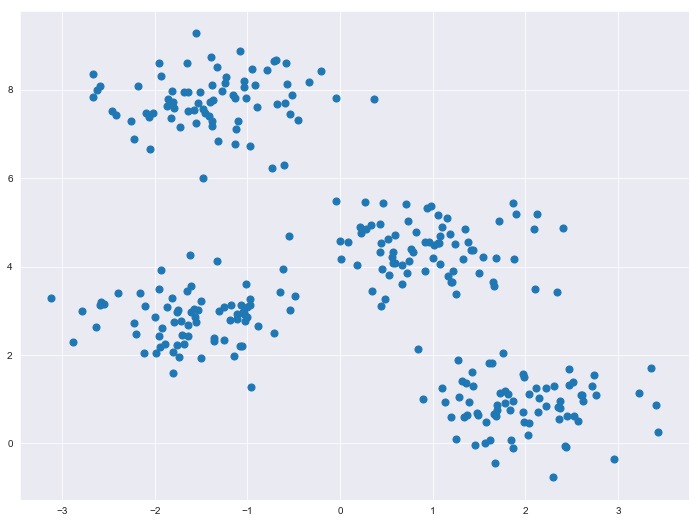

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], s=50);

Now let's see what k-means algorithm can do:

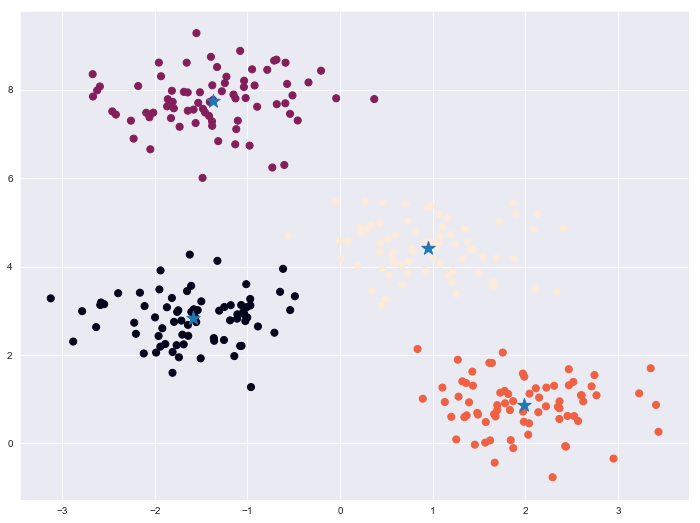

In [13]:
# Import KMeans
from sklearn.cluster import KMeans# Create Kmeans model
kmeans = KMeans(n_clusters=4)# Your code here
# Train model with whole data
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
plt.figure(figsize=(12,9))
# Make a scatter plot and visualize centroids
plt.scatter(x=X[: , 0], y = X[:,1], c=y_kmeans, s=50)
centroids = kmeans.cluster_centers_
plt.scatter(x=centroids[:,0], y = centroids[:,1], s=200,marker="*")

SyntaxError: positional argument follows keyword argument (<ipython-input-9-d2ca658cc0d8>, line 2)

**Expectation-Maximization**

In short, the expectation–maximization approach here consists of the following procedure:

    1. Guess some cluster centers.
    2. Step 2 - E-step: Assign each data point to the nearest cluster center.
    3. Step 3 - M-step: Move the centroids to the center of their clusters.
    4. Step 4: Keep repeating steps 2 and 3 until the centroid stop moving a lot at each iteration.
    
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">

**Optimal k in k-means?**

It's often not very apparent what k should be. So how do we validate the most appropriate k?

We can use the elbow method, which runs k-means for a range of possible k values, and for each k, we score the result. A common scoring is to calculate the sum of squared errors.

We plot the scores and consider the "elbow" value to be the optimal k. The intuition is that we want to minimize our sum of squared error (sse), but the sse →0 as k→∞. So the goal is to minimize k while also choosing a small sse.

Text(0, 0.5, 'num of distance')

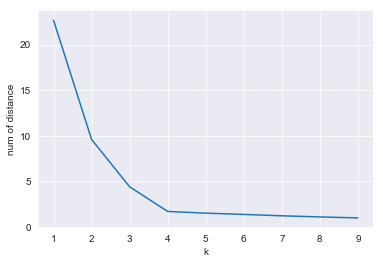

In [20]:
# Using Elbow method to find K
k_values= range(1,10)
list_kmean_models=[KMeans(n_clusters=k) for k in k_values]
scores = [model.fit(X).score(X) for model in list_kmean_models]
norm_scores = [score/max(scores) for score in scores]
plt.plot(k_values,norm_scores)
plt.xlabel("k")
plt.ylabel("num of distance")

Check out this [visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) of the k-means algorithm.

### Hierarchical Clustering Algorithms

Hierarchical clustering is an alternative approach to k-means clustering for identifying groups in the dataset. It does not require us to pre-specify the number of clusters to be generated as is required by the k-means approach. Furthermore, hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram.

Hierarchical clustering can be divided into **two main types**: agglomerative and divisive.

- **Agglomerative clustering**: It’s also known as AGNES (Agglomerative Nesting). It works in a bottom-up manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below). The result is a tree which can be plotted as a dendrogram.
- **Divisive hierarchical clustering**: It’s also known as DIANA (Divise Analysis) and it works in a top-down manner. The algorithm is an inverse order of AGNES. It begins with the root, in which all objects are included in a single cluster. At each step of iteration, the most heterogeneous cluster is divided into two. The process is iterated until all objects are in their own cluster (see figure below). 

Note that **agglomerative clustering** is good at identifying **small clusters**. **Divisive hierarchical clustering** is good at identifying **large clusters**.
![img](http://www.sthda.com/sthda/RDoc/images/hierarchical-clustering-agnes-diana.png)


**Steps to Perform Hierarchical Clustering**

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

1. Measure the distance between the closes points of two clusters.
2. Measure the distance between the farthest points of two clusters.
3. Measure the distance between the centroids of two clusters.
4. Measure the distance between all possible combination of points between the two clusters and take the mean.

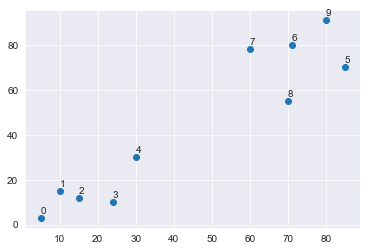

In [29]:
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91]])
plt.scatter(X[:,0], X[:,1]);
for i in range(len(X)):
    plt.annotate(i, X[i] + (0 , 2))

In [30]:
# Import dendrogram and linkage
from scipy.cluster.hierarchy import dendrogram , linkage

# generate the linkage matrix
Z = linkage(X, 'ward')

# linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
# Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation.
# The algorithm will merge the pairs of cluster that minimize this criterion.

# - ward minimizes the variance of the clusters being merged.
# - average uses the average of the distances of each observation of the two sets.
# - complete or maximum linkage uses the maximum distances between all observations of the two sets.
# - single uses the minimum of the distances between all observations of the two sets.


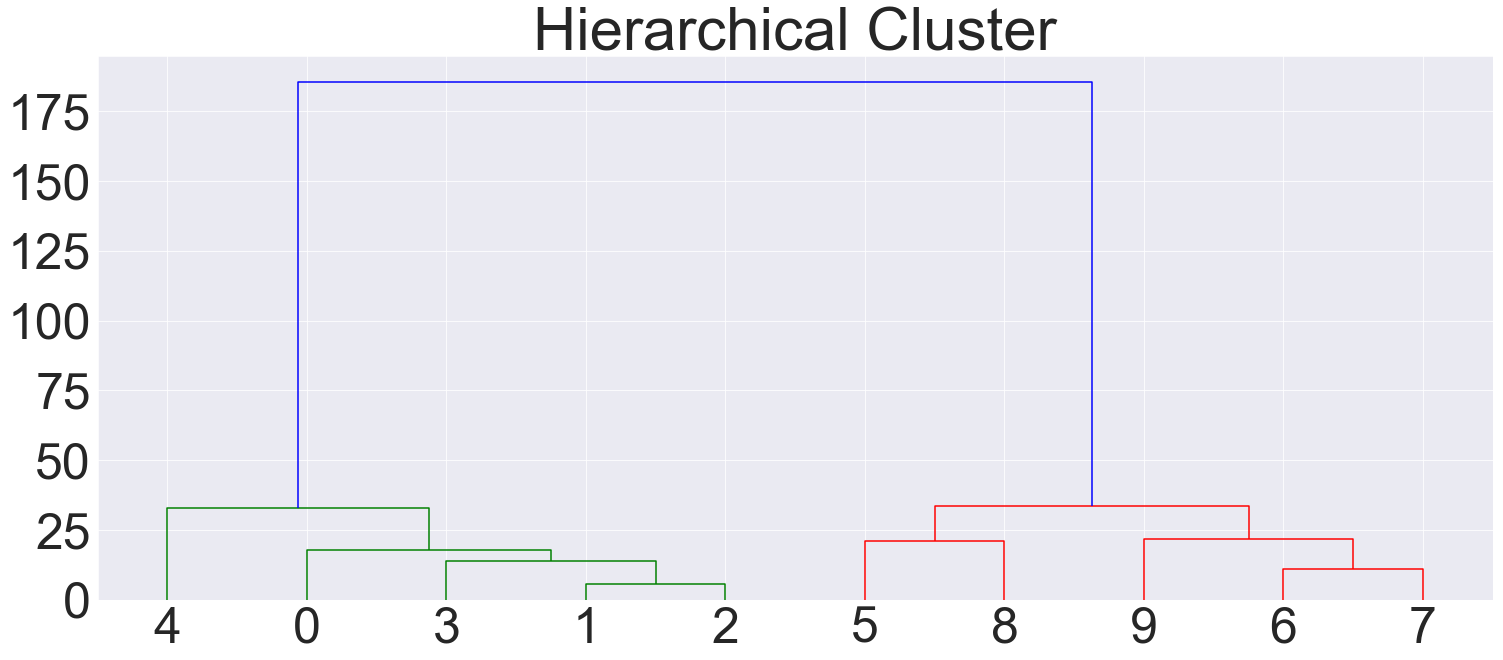

In [32]:
# calculate full dendrogram
fig = plt.figure(figsize=(25, 10))
plt.yticks(fontsize=50)
plt.title("Hierarchical Cluster",fontsize=60)
# Your code here
dendrogram(
    Z,
    leaf_font_size=50
);

**Selecting a Distance Cut-Off determines the Number of Clusters**

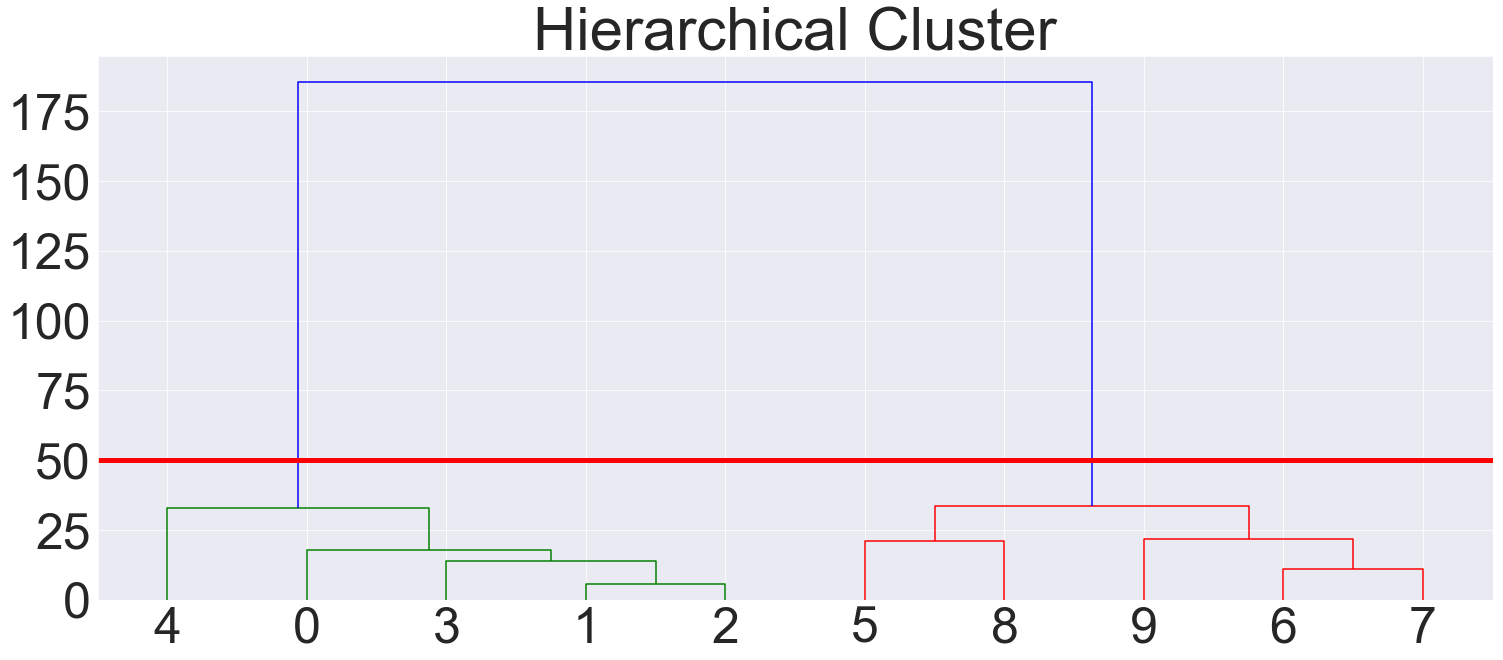

In [35]:
max_d = 50
# calculate full dendrogram
fig = plt.figure(figsize=(25, 10))
plt.yticks(fontsize=50)
plt.title("Hierarchical Cluster",fontsize=60)
# Your code here
dendrogram(
    Z,
    leaf_font_size=50
);
plt.axhline(y=max_d, c='r',linewidth=5)

In [39]:
# Import AgglomerativeClustering lib
# Your code here
from sklearn.cluster import AgglomerativeClustering
# Create model and fit
# Your code here
agg_model = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(X)
# Print out label of each datapoints
# Your code here
agg_model.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

### Principal Components Analysis

Principal Component Analysis (PCA) involves the process by which principal components are computed, and their role in understanding the data. PCA is an unsupervised approach, which means that it is performed on a set of variables with no associated response . **PCA reduces the dimensionality of the data set**, **allowing most of the variability** to be explained using fewer variables. PCA is commonly used as one step in a series of analyses. You can use PCA to reduce the number of variables and avoid multicollinearity, or when you have too many predictors relative to the number of observations.

![img](http://efavdb.com/wp-content/uploads/2018/06/simple_line.jpg)

![img](https://i.imgur.com/9UhxOPF.jpg)

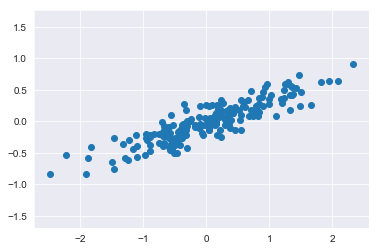

In [42]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [43]:
# Import PCA
from sklearn.decomposition import PCA
# Create PCA with n_components=2
pca = PCA(n_components=2)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


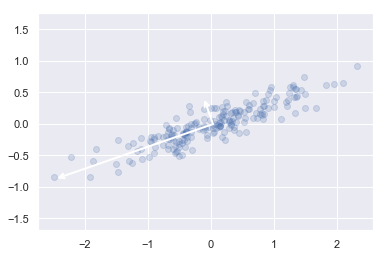

In [44]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
sns.set()
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [45]:
# Create PCA model with n_components=1
# Your code here
pca = PCA(n_components=1)
# Fitting model with X
pca.fit(X)
# Your code here
X_pca = pca.transform(X)
# Transform X and save result in X_pca
# your code here
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


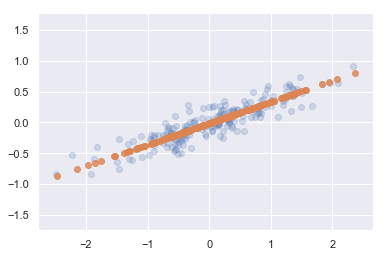

In [46]:
# Inverse and plot data
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### Example: k-means for color compression

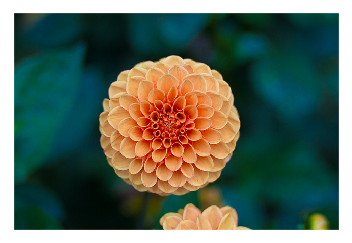

In [47]:
from sklearn.datasets import load_sample_image
image = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [48]:
print(image.shape)
data = image / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(427, 640, 3)


(273280, 3)

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

In [49]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

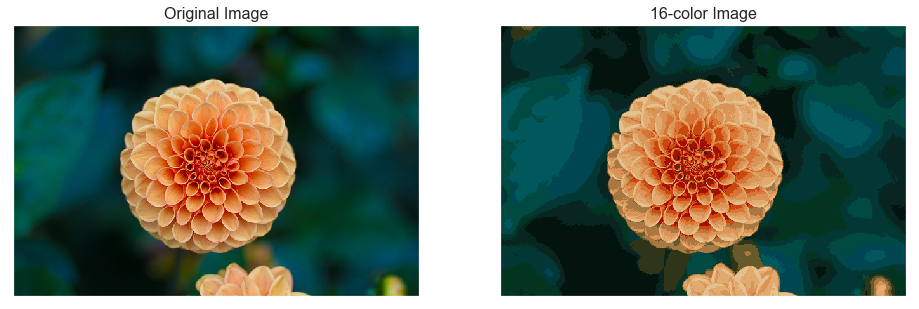

In [50]:
image_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16);